In [61]:
import os 
import sys 
import time 
import numpy as np
import json
import tpch_training as tp 

In [70]:
training_fnames = ['./new_training_results/'+x for x in os.listdir('./new_training_results') if 'json' in x]
len(training_fnames)
training_fnames

def get_spark_params(result_dict):
    param_vals = []
    for param in tp.SPARK_PARAMETERS:
        for p in result_dict['params']:
            if p['name'] == param['name']:
                param_vals.append(p['cur_value'])
    return tuple(param_vals)

In [71]:
defaults = tuple(a['default_value'] for a in tp.SPARK_PARAMETERS)

In [72]:
fname_numdata = {}

deterministic_data = {}

for fname in training_fnames:
    with open(fname,'r+') as file:
        file_data = json.load(file)
        fname_numdata[fname] = len(file_data)
        if 'deterministic' in fname:
            deterministic_data[fname] = file_data
print(sum(fname_numdata.values()))
fname_numdata

223


{'./new_training_results/sf60_main_job_n12_mem_4000_random_1668375820.3112397.json': 135,
 './new_training_results/sf60_main_job_n12_mem_4000_deterministic_1668375574.6167614.json': 88}

In [75]:
det_params = {}
det_rt = {}
for fname, data in deterministic_data.items():
    det_params[fname] = []
    det_rt[fname] = []
    for result_dict in data.values():
        det_params[fname].append(get_spark_params(result_dict))
        if result_dict['runtimes']:
            det_rt[fname].append(result_dict['runtimes']['total'])
prev_fname = fname
for fname in det_params:
    assert det_params[fname][0] == defaults, f'{det_params[fname][0]} !=\n{defaults}'
    assert det_params[fname] == det_params[prev_fname], fname + " " + prev_fname
    print(fname[18:60], '\n',det_rt[fname][0], det_rt[fname][-1], max(det_rt[fname]), min(det_rt[fname]))

ults/sf60_main_job_n12_mem_4000_determinis 
 [0.16154813766479492, 0.15991711616516113, 0.16006231307983398, 0.16521739959716797, 0.15964961051940918, 0.15554523468017578, 0.15646934509277344, 0.1558856964111328, 0.1617431640625, 0.1606433391571045, 0.15515351295471191, 0.15254449844360352, 0.1917281150817871, 0.1571059226989746, 0.16254806518554688, 0.15723299980163574, 0.15367650985717773, 0.15347552299499512, 0.15196585655212402, 0.15251755714416504, 0.15598797798156738, 0.15845775604248047, 0.15335440635681152, 0.15180182456970215, 0.15324711799621582, 0.1525707244873047, 0.15200018882751465, 0.16099047660827637, 0.15822887420654297, 0.18758726119995117, 0.15323996543884277, 0.16131234169006348, 0.17541050910949707, 0.16913104057312012, 0.17693400382995605, 0.1741635799407959, 0.16303753852844238, 0.18079447746276855, 0.19227933883666992, 0.16926217079162598, 0.16914916038513184, 0.17902874946594238, 0.1696643829345703, 0.1693577766418457, 0.16531825065612793, 0.17242717742919922, 

In [76]:
# how many different param combos have we tried?
fname_num_params = {}
fname_valid = {}
for fname in training_fnames:
    with open(fname,'r+') as file:
        file_data = json.load(file)
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in file_data.values():
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0


In [77]:
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    print(fname[18:60], '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

232
ults/sf60_main_job_n12_mem_4000_random_166 
num unique params 144 total runs 135 valid runs 134
ults/sf60_main_job_n12_mem_4000_determinis 
num unique params 88 total runs 88 valid runs 87


In [1]:
#det_rt

In [80]:
for fname in det_rt:
    all_runs = []
    for run in det_rt[fname]:
        all_runs += run
        print('avg ', round(np.average(run), 5), 'median', round(np.median(run), 5), 'range ', round(max(run)-min(run),5), 'std ', round(np.std(run), 5))
    print('overall runs avg ', round(np.average(all_runs), 5), 'median', round(np.median(all_runs), 5), 'range ', round(max(all_runs)-min(all_runs),5), 'std ', round(np.std(all_runs), 5))
              
        

avg  0.16503 median 0.16177 range  0.0524 std  0.0113
avg  0.15123 median 0.14944 range  0.0084 std  0.00308
avg  0.15308 median 0.15075 range  0.02511 std  0.0071
avg  0.16134 median 0.15901 range  0.02807 std  0.00898
avg  0.16708 median 0.16452 range  0.04079 std  0.01083
avg  0.15287 median 0.15244 range  0.01077 std  0.00341
avg  0.15207 median 0.14837 range  0.03191 std  0.00921
avg  0.15229 median 0.1508 range  0.02635 std  0.00735
avg  0.15329 median 0.1489 range  0.03842 std  0.01081
avg  0.14854 median 0.14839 range  0.00575 std  0.00182
avg  0.14724 median 0.14543 range  0.00783 std  0.00291
avg  0.15005 median 0.14804 range  0.01546 std  0.00446
avg  0.15953 median 0.15978 range  0.01852 std  0.00577
avg  0.16058 median 0.16015 range  0.00821 std  0.00281
avg  0.17156 median 0.17276 range  0.05391 std  0.01443
avg  0.16988 median 0.17078 range  0.00836 std  0.00328
avg  0.16093 median 0.16046 range  0.01334 std  0.00414
avg  0.15116 median 0.14794 range  0.01798 std  0.0061

sf60_main_job_n12_mem_4000_deterministic_1668378306.9431982.json 88
default, min: 0.18532, max: 0.22292, median 0.19535, avg: 0.19701  default: (0.18532, 0.22292)
spark.executor.cores, min: 0.1787, max: 0.21078, median 0.18374, avg: 0.18527  default: (0.18532, 0.22292)
spark.executor.memory, min: 0.1781, max: 0.20627, median 0.18161, avg: 0.18453  default: (0.18532, 0.22292)
spark.executor.instances, min: 0.17791, max: 0.203, median 0.18226, avg: 0.18418  default: (0.18532, 0.22292)
spark.driver.cores, min: 0.17735, max: 0.2118, median 0.18179, avg: 0.18483  default: (0.18532, 0.22292)
spark.driver.memory, min: 0.17807, max: 0.1976, median 0.18239, avg: 0.18424  default: (0.18532, 0.22292)
spark.reducer.maxSizeInFlight, min: 0.17772, max: 0.20336, median 0.18246, avg: 0.18472  default: (0.18532, 0.22292)
spark.shuffle.compress, min: 0.17739, max: 0.20534, median 0.18361, avg: 0.18445  default: (0.18532, 0.22292)
spark.shuffle.spill.compress, min: 0.17796, max: 0.20315, median 0.18215, 

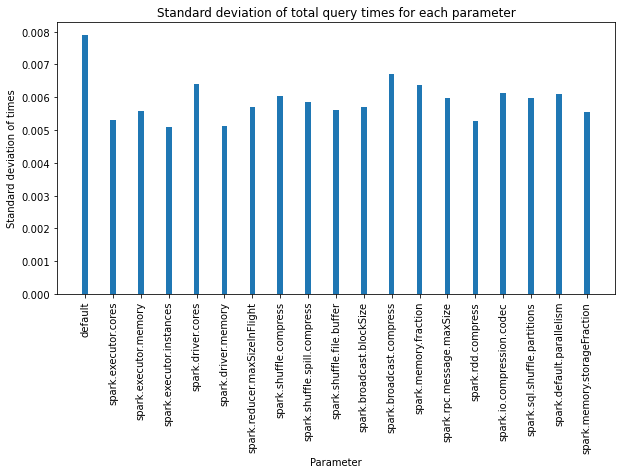

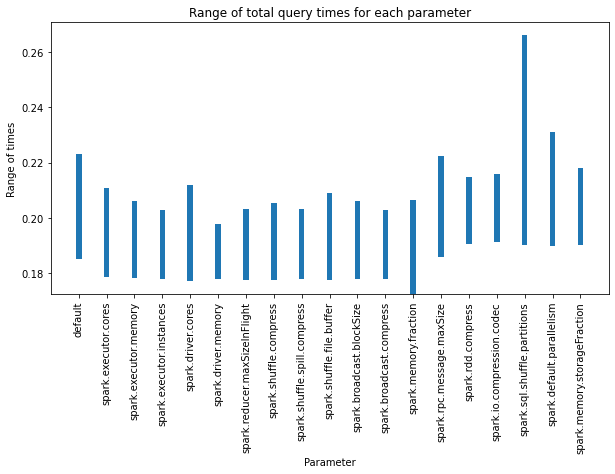

In [15]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class Parameter:
    def __init__(self, name):
        self.name = name
        self.val_to_results = {}

    def add(self, param_val, results):
        self.val_to_results[param_val] = results

    def get_total(self, param_val):
        if param_val in self.val_to_results:
            return self.val_to_results[param_val]["total"]

    def get_param_vals(self):
        return set(self.val_to_results.keys())

param_name_to_param_obj = {}

def populate_params():
    #analyze one file
    direc = "./new_training_results/"
    files = os.listdir(direc)
    files = [f for f in files if os.path.isfile(direc+'/'+f)] #just files
    for file in files:
        if "deterministic" in file:
            f = open(direc + file)
            data = json.load(f)
            print(file, len(data))
            for k in data:
                d = data[k]
                params = d["params"]
                runtimes = d["runtimes"]
                if len(runtimes) == 0:
                    continue

                all_default = True
                for p in params:
                    if p['spark_param'] and p['cur_value'] != p['default_value']:
                        varying_param = p['name']
                        all_default = False
                        break
                if all_default:
                    param_name_to_param_obj["default"] = runtimes
                    continue
                if varying_param not in param_name_to_param_obj:
                    param_name_to_param_obj[varying_param] = Parameter(varying_param)
                obj = param_name_to_param_obj[varying_param]
                assert "total" in runtimes
                obj.add(p['cur_value'], runtimes)
            f.close()
            return

def analyze_results():
    populate_params()
    default = param_name_to_param_obj["default"]
    default_total = default["total"]
    mins = []
    names = []
    diffs = []
    stds = []
    for p in param_name_to_param_obj:
        min_runtime = float("inf")
        max_runtime = -float("inf")
        times = []
        if p != 'default':
            obj = param_name_to_param_obj[p]
            for k in obj.get_param_vals():
                total_time = obj.get_total(k)
                times.extend(total_time)
                min_runtime = min(min_runtime, min(total_time))
                max_runtime = max(max_runtime, max(total_time))
            if min_runtime == max_runtime:
                max_runtime += .001

            
        else:
            times.extend(default_total)
            min_runtime = min(default_total)
            max_runtime = max(default_total)
        stds.append(np.std(times))
        print(f"{p}, min: {round(min_runtime,5)}, max: {round(max_runtime,5)}, median {round(np.median(times),5)}, avg: {round(np.average(times),5)}  default: {round(min(default_total),5), round(max(default_total),5)}")
        mins.append(min_runtime)
        diffs.append(max_runtime - min_runtime)
        names.append(p)

    #save total time std to csv
    df = pd.DataFrame(list(zip(names, stds)),
    columns =['name', 'standard_dev_total_times'])
    df.to_csv("./training_sensitivity/all_runtime_stds.csv", mode='w')

    #plot std
    fig = plt.figure(figsize = (10, 5))
    plt.xticks(rotation=90)
    plt.bar(names, stds, bottom=[0]*len(names), width=0.2)
    plt.title("Standard deviation of total query times for each parameter")
    plt.xlabel("Parameter")
    plt.ylabel("Standard deviation of times")
    plt.savefig("./training_sensitivity/all_run_time_stds.jpg", bbox_inches="tight")

    #plot min/max times for each parameter
    fig = plt.figure(figsize = (10, 5))
    plt.xticks(rotation=90)
    plt.bar(names, diffs, bottom=mins, width=0.2)
    plt.title("Range of total query times for each parameter")
    plt.xlabel("Parameter")
    plt.ylabel("Range of times")
    plt.savefig("./training_sensitivity/time_ranges.jpg", bbox_inches="tight")
    plt.show()

analyze_results()

In [10]:
FNAME = './training_sensitivity/sf60_main_job_n10_mem_4000_deterministic_1668379873.1458247.json'

./training_sensitivity/sf60_main_job_n10_mem_4000_deterministic_1668379873.1458247.json 88
default, min: 0.15260720252990723, max: 0.15360720252990723, default: 0.15260720252990723
spark.executor.cores, min: 0.14250695705413818, max: 0.1521393060684204, default: 0.15260720252990723
spark.executor.memory, min: 0.13938653469085693, max: 0.14753174781799316, default: 0.15260720252990723
spark.executor.instances, min: 0.1449298858642578, max: 0.15044963359832764, default: 0.15260720252990723
spark.driver.cores, min: 0.1440110206604004, max: 0.1445692777633667, default: 0.15260720252990723
spark.driver.memory, min: 0.13888895511627197, max: 0.15668964385986328, default: 0.15260720252990723
spark.reducer.maxSizeInFlight, min: 0.14102184772491455, max: 0.1501767635345459, default: 0.15260720252990723
spark.shuffle.compress, min: 0.1425238847732544, max: 0.1425238847732544, default: 0.15260720252990723
spark.shuffle.spill.compress, min: 0.1451789140701294, max: 0.1451789140701294, default: 0.1

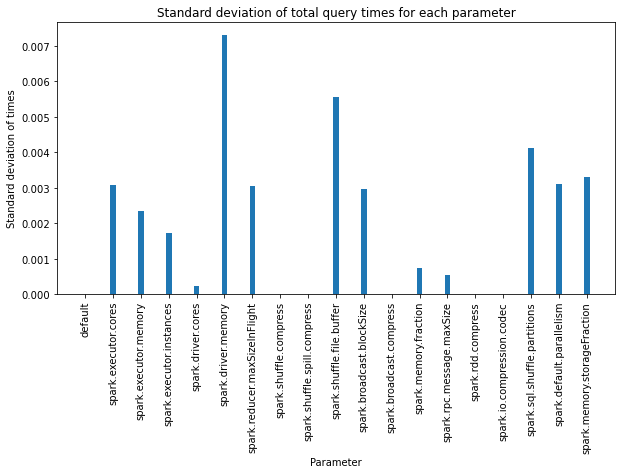

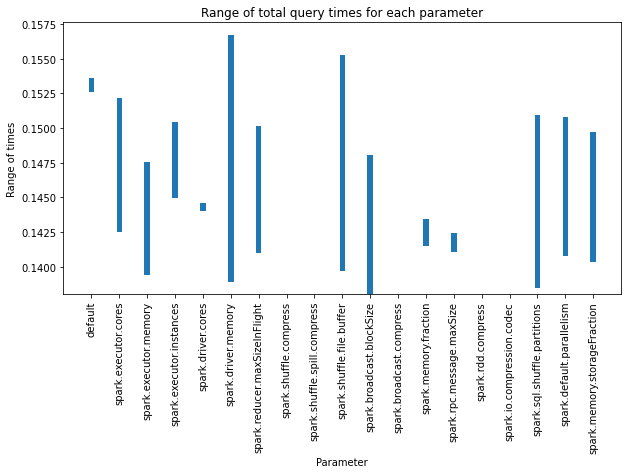

In [11]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class Parameter:
    def __init__(self, name):
        self.name = name
        self.val_to_results = {}

    def add(self, param_val, results):
        self.val_to_results[param_val] = results

    def get_total(self, param_val):
        if param_val in self.val_to_results:
            return self.val_to_results[param_val]["total"]

    def get_param_vals(self):
        return set(self.val_to_results.keys())

param_name_to_param_obj = {}

def populate_params():
    #analyze one file
    #direc = "./training_data/training_results/"
    #files = os.listdir(direc)
    files = [FNAME] #just files
    for file in files:
        if "deterministic" in file:
            f = open(file)
            data = json.load(f)
            print(file, len(data))
            for k in data:
                d = data[k]
                params = d["params"]
                runtimes = d["runtimes"]
                if len(runtimes) == 0:
                    continue

                all_default = True
                for p in params:
                    if p['spark_param'] and p['cur_value'] != p['default_value']:
                        varying_param = p['name']
                        all_default = False
                        break
                if all_default:
                    param_name_to_param_obj["default"] = runtimes
                    continue
                if varying_param not in param_name_to_param_obj:
                    param_name_to_param_obj[varying_param] = Parameter(varying_param)
                obj = param_name_to_param_obj[varying_param]
                assert "total" in runtimes
                obj.add(p['cur_value'], runtimes)
            f.close()
            return

def analyze_results():
    populate_params()
    default = param_name_to_param_obj["default"]
    default_total = default["total"]
    mins = []
    names = []
    diffs = []
    stds = []
    for p in param_name_to_param_obj:
        min_runtime = float("inf")
        max_runtime = -float("inf")
        times = []
        if p != 'default':
            obj = param_name_to_param_obj[p]
            for k in obj.get_param_vals():
                total_time = obj.get_total(k)
                times.append(total_time)
                min_runtime = min(min_runtime, total_time)
                max_runtime = max(max_runtime, total_time)
            
        else:
            times.append(default_total)
            min_runtime = default_total
            max_runtime = default_total + 0.001
        stds.append(np.std(times))
        print(f"{p}, min: {min_runtime}, max: {max_runtime}, default: {default_total}")
        mins.append(min_runtime)
        diffs.append(max_runtime - min_runtime)
        names.append(p)

    #save total time std to csv
    df = pd.DataFrame(list(zip(names, stds)),
    columns =['name', 'standard_dev_total_times'])
    df.to_csv("training_sensitivity/time_stds.csv", mode='w')

    #plot std
    fig = plt.figure(figsize = (10, 5))
    plt.xticks(rotation=90)
    plt.bar(names, stds, bottom=[0]*len(names), width=0.2)
    plt.title("Standard deviation of total query times for each parameter")
    plt.xlabel("Parameter")
    plt.ylabel("Standard deviation of times")
    plt.savefig("training_sensitivity/time_stds.jpg", bbox_inches="tight")

    #plot min/max times for each parameter
    fig = plt.figure(figsize = (10, 5))
    plt.xticks(rotation=90)
    plt.bar(names, diffs, bottom=mins, width=0.2)
    plt.title("Range of total query times for each parameter")
    plt.xlabel("Parameter")
    plt.ylabel("Range of times")
    plt.savefig("training_sensitivity/time_ranges.jpg", bbox_inches="tight")
    plt.show()

analyze_results()